# Practice Project - 2

# Medical Cost Personal Insurance Datasets

Problem Statement:
Insurance Forecast by using Regression Algorithms

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns                                            

·         age: age of primary beneficiary

·         sex: insurance contractor gender, female, male

·       bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

·       children: Number of children covered by health insurance / Number of dependents

·     smoker: Smoking

·      region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

·     charges: Individual medical costs billed by health insurance

Predict : Charges  Can you accurately predict insurance costs?

In [1]:
# importing required initial libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading csv file 
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()  # Checking df information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.dtypes  # checking df data types

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Observations: Eventhough "children" is categorical in nature, data type is "int64" as the values in the column are integers, hence it is fine and no need to change the data type of it to "Object"

In [5]:
df.shape # Check the dimension of the matrix

(1338, 7)

# Null Values Check

In [6]:
df.isnull().sum() # Checking the sum of null values for all columns

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Observations: Null values are zero in all columns

In [7]:
df.isnull().sum().sum()  # checking the total sum of null values for entire dataset

0

Observations: Null values are zero in the entire dataset

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Statistical Summary

In [9]:
df.describe() # statistical summary for discrete/continuous data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observations:
1. count is same for all columns hence no null values present
2. Mean > Median for columns (Rightly skewed): 'age','bmi'
3. More difference between 75 percentile and max for columns: 'bmi'..hene outliers are present

In [10]:
df.describe(include=['O']) # statistical summary for Object data

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Observations:
1. count is same for all columns hence no null values present
2. Unique values present in columns: sex --> 2, smoker -->2, region --> 4
3. Mode of columns: sex --> male, smoker -->no, region --> southeast
4. Frequency of mode value of columns: sex --> 676, smoker -->1064, region --> 364

# Visualization of data

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
# Checking the distribution of continuous data

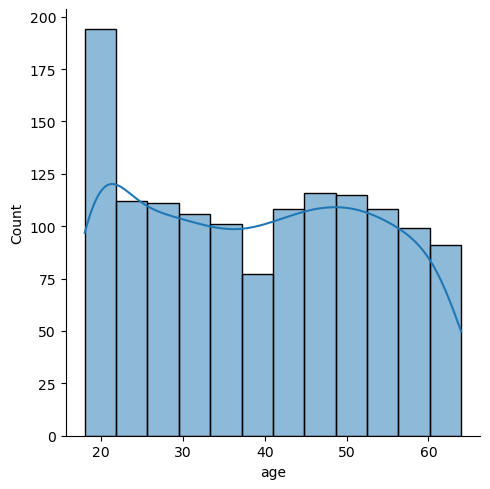

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df["age"],kde=True)
plt.show()

The data of the column is not normalized. The building blocks is out of the normalized curve.

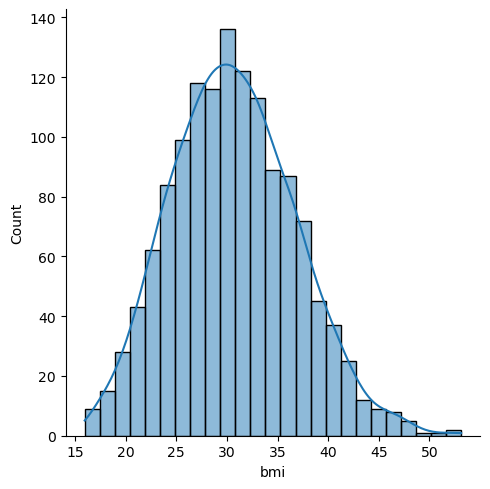

In [14]:
sns.displot(df["bmi"],kde=True)
plt.show()

The data of the column is not normalized. The building blocks is out of the normalized curve.

In [ ]:
# Checking the count of categorical data

male      676
female    662
Name: sex, dtype: int64


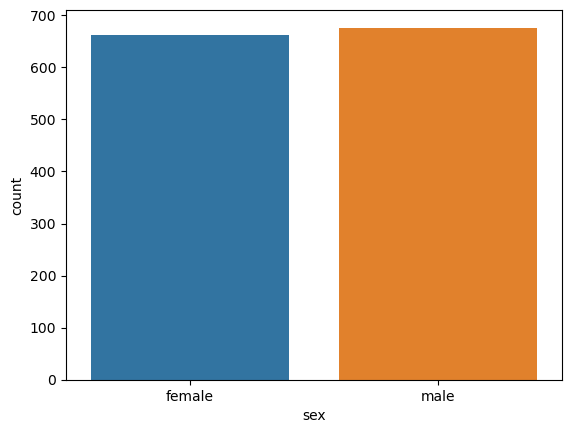

In [15]:
print(df["sex"].value_counts())
sns.countplot(df["sex"])
plt.show()

Observations: Total no. of males are 676 and the totla no. of females are 662

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


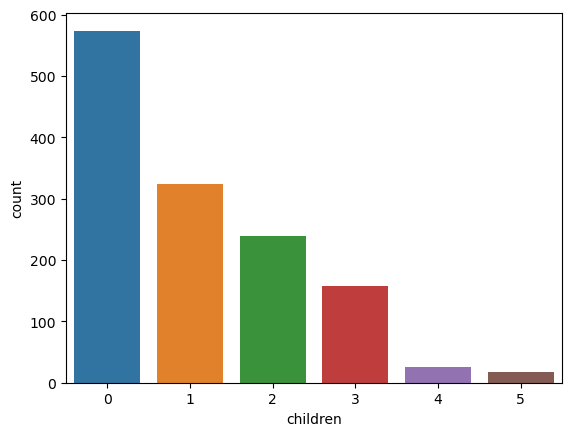

In [16]:
print(df["children"].value_counts())
sns.countplot(df["children"])
plt.show()

Observations: Total no. of 0 dependents: 1, Total no. of 1 dependent: 324, Total no. of 2 dependents: 240, Total no. of 3 dependents: 157, Total no. of 4 dependents: 25, Total no. of 5 dependents: 18 

no     1064
yes     274
Name: smoker, dtype: int64


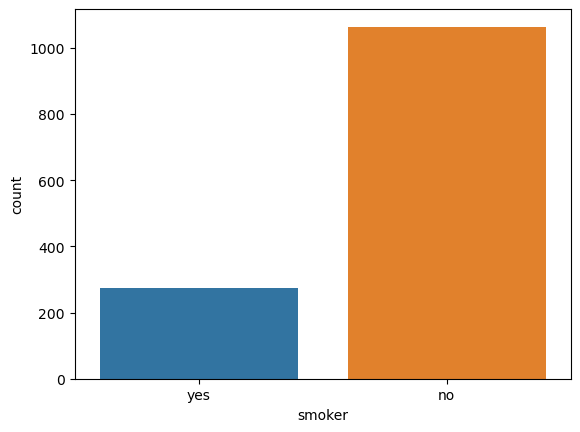

In [17]:
print(df["smoker"].value_counts())
sns.countplot(df["smoker"])
plt.show()

Observations: Total no. of "yes" are 274 and the totla no. of "no" are 1064

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


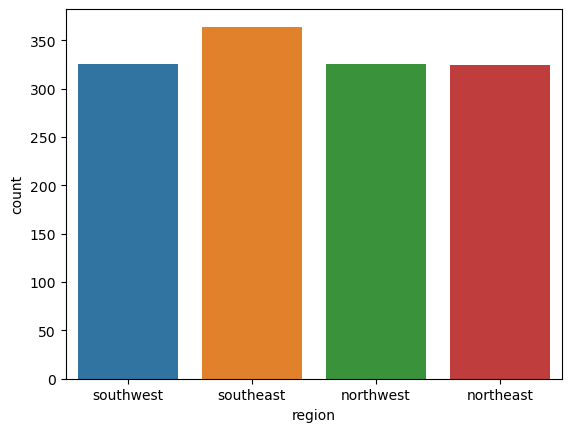

In [18]:
print(df["region"].value_counts())
sns.countplot(df["region"])
plt.show()

Observations: Total no. of "southeast" are 364, the totla no. of "southwest" are 325,the totla no. of "northwest" are 325 and the totla no. of "northeast" are 324

# Encoding of Categorical Data

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
# Encoding needed for columns "sex", "smoker", "region" to change string data to numerical format

In [21]:
from sklearn.preprocessing import LabelEncoder  # Using LabelEncoder
le=LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])
df.head(5)                        

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [22]:
le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

In [23]:
le=LabelEncoder()
df["smoker"]=le.fit_transform(df["smoker"])
df.head(5) 

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [24]:
le.inverse_transform([0,1])

array(['no', 'yes'], dtype=object)

In [25]:
le=LabelEncoder()
df["region"]=le.fit_transform(df["region"])
df.head(5) 

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [26]:
df["region"].unique()

array([3, 2, 1, 0])

In [27]:
le.inverse_transform([0,1,2,3])

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Checking coefficients of correlation (r)

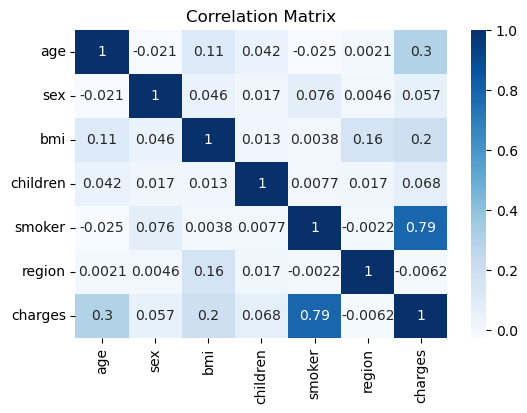

In [29]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r=df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_r,cmap="Blues",annot=True)
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.jpg")
plt.show()

In [30]:
corr_r["charges"].sort_values(ascending=False)  # Arranging the relationship of target variable with other variables in descending order

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

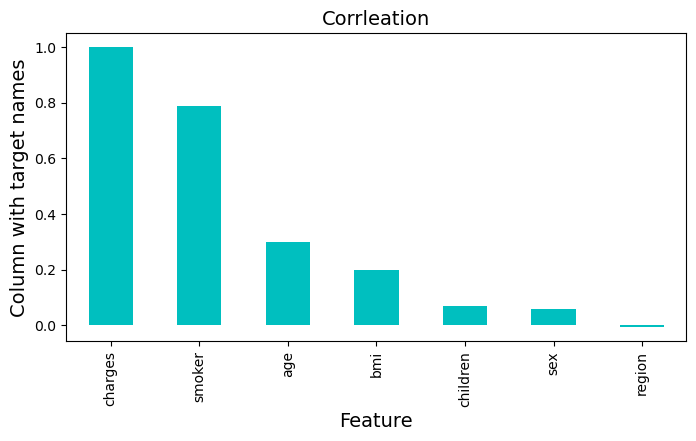

In [31]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(8,4))
corr_r["charges"].sort_values(ascending=False).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Column with target names",fontsize=14)
plt.title("Corrleation",fontsize=14)
plt.show()

Observations: (Correlation of Target variable with features)
1. Max correlation: smoker
2. Min correlation: region.
Eventhough "region" has weak correlation, this column is not dropped from the dataset as the dataset is small and dropping this column will loose the information

# Pre-Processing

In [32]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [33]:
# Segregating only X data
x=df.drop("charges",axis=1)

In [34]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [35]:
# Segregating only Y data
y=df["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Skewness Check

In [36]:
# Checking skeweness and arranging the values in descending order
df.skew().sort_values(ascending=False)  

charges     1.515880
smoker      1.464766
children    0.938380
bmi         0.284047
age         0.055673
sex        -0.020951
region     -0.038101
dtype: float64

Observations: Current Skewness range for X continuous data: (+0.28,-0.28)
In general, we accept skewness range of -0.5 to +0.5, however this is not fixed hence different methods will be applied to remove skewness and will select the one with least skewness range.

Below are the variables
age         Continuous 
sex         Categorical
bmi         Continuous
children    Categorical
smoker      Categorical
region      Categorical
charges     Target Variable
---------------------------------->
Max skewness @ bmi: 0.284047
Min skewness @ age: 0.055673
---------------------------------->
We don't remove skewness for X categorical columns and for target variable

# Checking Outliers

We don't remove outliers of categorical X columns and in target variable
age         Continuous 
sex         Categorical
bmi         Continuous
children    Categorical
smoker      Categorical
region      Categorical
charges     Target Variable
--> Checking outliers on columns "age", "bmi"

In [37]:
df["age"]

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

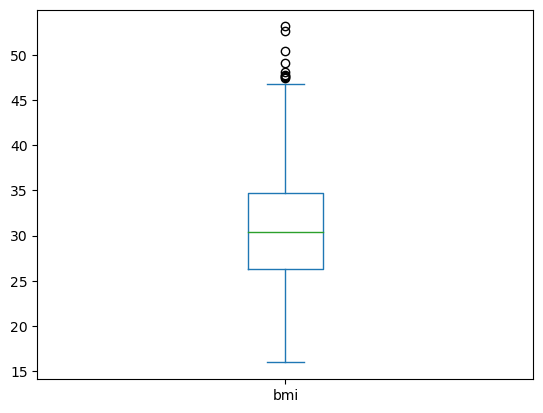

In [38]:
df["bmi"].plot.box()
plt.show()

Observations: Outliers present in 'bmi'

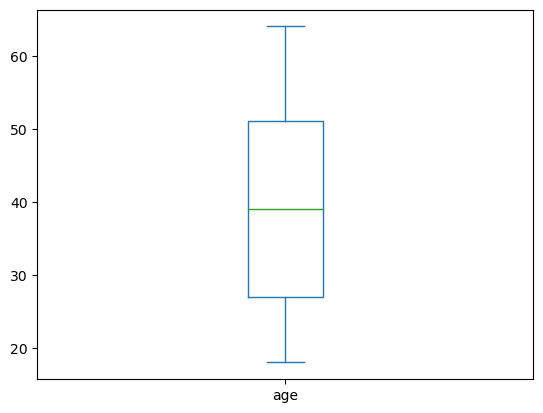

In [39]:
df["age"].plot.box()
plt.show()

Observations: No Outliers present in 'age'

# Removing Outliers

In [40]:
# Calculating z score & identifying the rows and columns where absolute z score > 3
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3
np.where(z>3)

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
         932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
       dtype=int64),
 array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2],
       dtype=int64))

In [41]:
x.shape

(1338, 6)

In [42]:
y.shape

(1338,)

In [43]:
# Removing the rows in both x and y where the outliers are present in x features
x_new=x[(z<3).all(axis=1)]
y_new=y[(z<3).all(axis=1)]
x=x_new
y=y_new

In [44]:
(np.abs(zscore(x))<3).all().all() # Checking the absolute zscore < 3 for the x data after removing outliers

True

In [45]:
x.shape

(1316, 6)

In [46]:
y.shape

(1316,)

In [47]:
# Data loss calculation
loss_percent=(1338-1316)/1338*100
loss_percent

1.6442451420029895

Observations:
Data loss is less than 10% hence it is acceptable

# Transforming data to remove skewness

In [49]:
# Method1: Using BoxCox Method
from scipy.stats import boxcox
x1=pd.DataFrame()
x1['age']=boxcox(x['age'],0)
x1['bmi']=boxcox(x['bmi'],0)

In [50]:
x1.skew().sort_values(ascending=False)

bmi   -0.307966
age   -0.378323
dtype: float64

Observations: Skewness range: (+0.38,-0.38)

In [51]:
# Method2: Log transformation using numpy
import numpy as np
x2=pd.DataFrame()
x2['age']=np.log(x['age'])
x2['bmi']=np.log(x['bmi'])

In [52]:
x2.skew().sort_values(ascending=False)

bmi   -0.307966
age   -0.378323
dtype: float64

Observations: Skewness range: (+0.38,-0.38)

In [53]:
# Method 3: Using PowerTransformer
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [54]:
# Segregating only required columns "age" and "bmi" to apply powertransformer
x3_n=x.drop(["sex","children","smoker","region"],axis=1)

In [55]:
x3_n

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


In [56]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_new_pt=pt.fit_transform(x3_n)
x_3=pd.DataFrame(data=x_new_pt,columns=x3_n.columns)
x_3.skew().sort_values(ascending=False)

bmi   -0.012546
age   -0.101915
dtype: float64

Observations: Skewness range: (+0.1,-0.1)
Skewness is reduced better in powertransformer compared to other two methods hence considering the transformed data from powertransform for training the model

In [57]:
# Consolidating the tranformed x columns with the remaining untransformed x columns to get the entire x data for model building
x_3

,age,bmi
0,-1.525474,-0.419803
1,-1.616848,0.555771
2,-0.767728,0.432095
3,-0.385137,-1.357505
4,-0.459889,-0.251355
...,...,...
1311,0.782259,0.100105
1312,-1.616848,0.256569
1313,-1.616848,1.039060
1314,-1.347657,-0.789294


In [58]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [59]:
x.drop(["age","bmi"],axis=1,inplace=True)   # dropping untransformed "age" and "bmi" columns

In [60]:
x

,sex,children,smoker,region
0,0,0,1,3
1,1,1,0,2
2,1,3,0,2
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
1333,1,3,0,1
1334,0,0,0,0
1335,0,0,0,2
1336,0,0,0,3


In [61]:
new_x=x   # Assining x to new_x
new_x

,sex,children,smoker,region
0,0,0,1,3
1,1,1,0,2
2,1,3,0,2
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
1333,1,3,0,1
1334,0,0,0,0
1335,0,0,0,2
1336,0,0,0,3


Observations: Index values are different eventhough dimensions are same between x and x_3, hence need to make index values same between these two before joining them to get the updated x data for model building 

In [62]:
x.index.values # checking the index values in x after removing outliers

array([   0,    1,    2, ..., 1335, 1336, 1337], dtype=int64)

In [63]:
x_3.index.values # checking the index values of x_3 after applying the transformation

array([   0,    1,    2, ..., 1313, 1314, 1315], dtype=int64)

In [64]:
new_x["index"]=x_3.index.values  # Adding a new column in new_x with index values

In [65]:
new_x # new_x with additional column "index"

,sex,children,smoker,region,index
0,0,0,1,3,0
1,1,1,0,2,1
2,1,3,0,2,2
3,1,0,0,1,3
4,1,0,0,1,4
...,...,...,...,...,...
1333,1,3,0,1,1311
1334,0,0,0,0,1312
1335,0,0,0,2,1313
1336,0,0,0,3,1314


In [66]:
new_x.set_index("index",inplace=True) # Changing the index column in new_x to get the same index values of x_3 (tranformed x data) 
new_x

,sex,children,smoker,region
index,,,,
0,0,0,1,3
1,1,1,0,2
2,1,3,0,2
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
1311,1,3,0,1
1312,0,0,0,0
1313,0,0,0,2


In [67]:
upd_x = new_x.join(x_3)  # joining both "new_x" and "x_3" dataframes to get "upd_x" dataframe
upd_x

,sex,children,smoker,region,age,bmi
index,,,,,,
0,0,0,1,3,-1.525474,-0.419803
1,1,1,0,2,-1.616848,0.555771
2,1,3,0,2,-0.767728,0.432095
3,1,0,0,1,-0.385137,-1.357505
4,1,0,0,1,-0.459889,-0.251355
...,...,...,...,...,...,...
1311,1,3,0,1,0.782259,0.100105
1312,0,0,0,0,-1.616848,0.256569
1313,0,0,0,2,-1.616848,1.039060


# Scaling X data

In [68]:
# Applied standard scaler
# Here the standard scaler is applied eventhough skewness range is (+0.1,-0.1). Ideally scaling is not required as skewness is small. 
# However, scaling is applied to remove remaining small skewness and converting the data to the normally distributed data

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(upd_x)
x

array([[-1.00609762, -0.92823448,  1.95914147,  1.35208943, -1.52547382,
        -0.41980326],
       [ 0.99393934, -0.03853559, -0.51042766,  0.44656796, -1.61684824,
         0.55577125],
       [ 0.99393934,  1.74086219, -0.51042766,  0.44656796, -0.76772801,
         0.43209483],
       ...,
       [-1.00609762, -0.92823448, -0.51042766,  0.44656796, -1.61684824,
         1.03905968],
       [-1.00609762, -0.92823448, -0.51042766,  1.35208943, -1.34765661,
        -0.78929365],
       [-1.00609762, -0.92823448,  1.95914147, -0.45895351,  1.46012089,
        -0.21897484]])

In [69]:
x.shape

(1316, 6)

In [70]:
y.shape

(1316,)

# Model Building

In [ ]:
# Starting with "LinearRegression" as the target variable is continuous data

In [73]:
# Defining the required libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

lr=LinearRegression() # Defining instance for linearregression

# Finding the random state value where training r2-score = testing r2-score

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At randome state",i, " the model performs well")
        print("At randome state:",i)
        print("Training accuracy is",r2_score(y_train,pred_train)*100)
        print("Testing accuracy is",r2_score(y_test,pred_test)*100)
        print("Difference between Training and Testing accuracy is",(r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100))
        print("\n")

At randome state 63  the model performs well
At randome state: 63
Training accuracy is 74.87553480657736
Testing accuracy is 74.87860073866143
Difference between Training and Testing accuracy is 0.0030659320840698


At randome state 414  the model performs well
At randome state: 414
Training accuracy is 74.9004524097314
Testing accuracy is 74.8998253318325
Difference between Training and Testing accuracy is -0.0006270778988977099


At randome state 491  the model performs well
At randome state: 491
Training accuracy is 74.88043097014585
Testing accuracy is 74.87668937170278
Difference between Training and Testing accuracy is -0.0037415984430708704




Observations: As multple random states give same training and testing r2 scores, selected random state: 414

In [74]:
# Using the random state: 414 and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=414)

In [75]:
# Training the model and checking r2_score with the fixed random state: 414
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.748998253318325


# Cross Validation for Linear Regression

In [76]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=r2_score(y_test,pred_lr)

# Finding the optimized folds from Linear Regression where the cross validation score is same as model r2 score
for j in range(2,11):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print(" At CV:",j)
    print("Cross validation score is:",lsc*100)
    print("Model_accuracy_score is:",lss*100)
    print("Difference b/w Cross validation score and Model accuracy score is",lsc-lss)
    print("\n") 

 At CV: 2
Cross validation score is: 74.69230209323102
Model_accuracy_score is: 74.8998253318325
Difference b/w Cross validation score and Model accuracy score is -0.0020752323860148136


 At CV: 3
Cross validation score is: 74.33809722319319
Model_accuracy_score is: 74.8998253318325
Difference b/w Cross validation score and Model accuracy score is -0.005617281086393144


 At CV: 4
Cross validation score is: 74.43621473149503
Model_accuracy_score is: 74.8998253318325
Difference b/w Cross validation score and Model accuracy score is -0.004636106003374829


 At CV: 5
Cross validation score is: 74.54248921911508
Model_accuracy_score is: 74.8998253318325
Difference b/w Cross validation score and Model accuracy score is -0.0035733611271742127


 At CV: 6
Cross validation score is: 74.41110706208859
Model_accuracy_score is: 74.8998253318325
Difference b/w Cross validation score and Model accuracy score is -0.004887182697439152


 At CV: 7
Cross validation score is: 74.44480746259516
Model_ac

Observations: At CV=5, Difference b/w Cross validation score and Model r2 score is less hence selected CV=5

In [80]:
# Using fixed CV=5 and checking the cross validation score again to compare with model score 
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The CV score is:",lsscore_selected*100,"\nThe model score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV score is: 74.54248921911508 
The model score is: 74.8998253318325
Difference is: 0.0035733611271742127


# Other Classification Algorithms

In [78]:
# Checking accuracy with Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(r2_score(y_test,preddtc))

0.6922943467389278


In [79]:
score=cross_val_score(dtc,x,y,cv=5).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,preddtc)*100)
print("Difference is:",r2_score(y_test,preddtc)-score)

The CV score is: 69.20536962940169 
The model score is: 69.22943467389277
Difference is: 0.0002406504449108393


In [81]:
# Checking accuracy with KNearestNeighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
knnc=KNeighborsRegressor()
knnc.fit(x_train,y_train)
predknnc=knnc.predict(x_test)
print(r2_score(y_test,predknnc))

0.8023923771410265


In [82]:
score=cross_val_score(knnc,x,y,cv=5).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predknnc)*100)
print("Difference is:",r2_score(y_test,predknnc)-score)

The CV score is: 80.18279980492316 
The model score is: 80.23923771410266
Difference is: 0.0005643790917948532


In [83]:
# Checking accuracy with Gradient Descent Regressor
from sklearn.linear_model import SGDRegressor
sgdc=SGDRegressor()
sgdc.fit(x_train,y_train)
predsgdc=sgdc.predict(x_test)
print(r2_score(y_test,predsgdc))

0.7487904295645573


In [84]:
score=cross_val_score(sgdc,x,y,cv=5).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predsgdc)*100)
print("Difference is:",r2_score(y_test,predsgdc)-score)

The CV score is: 74.52802042490227 
The model score is: 74.87904295645573
Difference is: 0.0035102253155346874


In [86]:
# Checking accuracy with SVC Regressor
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_train,y_train)
predsvc=sv.predict(x_test)
print(r2_score(y_test,predsvc))

-0.1132952544597936


In [87]:
score=cross_val_score(sv,x,y,cv=5).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predsvc)*100)
print("Difference is:",r2_score(y_test,predsvc)-score)

The CV score is: -9.958606734095277 
The model score is: -11.32952544597936
Difference is: -0.013709187118840838


# Regularization

In [88]:
# Checking accuracy with Lasso Regressor
from sklearn.linear_model import Lasso
lsr=Lasso()
lsr.fit(x_train,y_train)
predlsr=lsr.predict(x_test)
print(r2_score(y_test,predlsr))

0.7490098282849399


In [89]:
score=cross_val_score(lsr,x,y,cv=5).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predlsr)*100)
print("Difference is:",r2_score(y_test,predlsr)-score)

The CV score is: 74.54293250102208 
The model score is: 74.900982828494
Difference is: 0.003580503274719038


In [90]:
# Checking accuracy with Ridge Regressor
from sklearn.linear_model import Ridge
rdr=Ridge()
rdr.fit(x_train,y_train)
predrdr=rdr.predict(x_test)
print(r2_score(y_test,predrdr))

score=cross_val_score(rdr,x,y,cv=5).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predrdr)*100)
print("Difference is:",r2_score(y_test,predrdr)-score)

0.7490216911256846
The CV score is: 74.54303421499047 
The model score is: 74.90216911256846
Difference is: 0.003591348975779951


In [91]:
# Checking accuracy with ElasticNet
from sklearn.linear_model import ElasticNet
elnr=ElasticNet()
elnr.fit(x_train,y_train)
predelnr=elnr.predict(x_test)
print(r2_score(y_test,predelnr))

score=cross_val_score(elnr,x,y,cv=5).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predelnr)*100)
print("Difference is:",r2_score(y_test,predelnr)-score)

0.6721907209479508
The CV score is: 66.38614243293982 
The model score is: 67.21907209479508
Difference is: 0.00832929661855264


# Ensembling Techniques

In [92]:
# Checking accuracy with Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
print(r2_score(y_test,predRFR))

score=cross_val_score(RFR,x,y,cv=5).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predRFR)*100)
print("Difference is:",r2_score(y_test,predRFR)-score)

0.8380368776169573
The CV score is: 83.39386977803171 
The model score is: 83.80368776169573
Difference is: 0.004098179836640181


In [93]:
# Checking accuracy with Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
ET=ExtraTreesRegressor()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(r2_score(y_test,predET))

score=cross_val_score(ET,x,y,cv=5).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predET)*100)
print("Difference is:",r2_score(y_test,predET)-score)

0.8213299136390224
The CV score is: 81.81151811212176 
The model score is: 82.13299136390224
Difference is: 0.003214732517804797


In [94]:
# Checking accuracy with Ada Boosting Regressor
from sklearn.ensemble import AdaBoostRegressor
ABC=AdaBoostRegressor()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(r2_score(y_test,predABC))

score=cross_val_score(ABC,x,y,cv=5).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predABC)*100)
print("Difference is:",r2_score(y_test,predABC)-score)

0.8158111762842948
The CV score is: 81.41262370768445 
The model score is: 81.58111762842948
Difference is: 0.0016849392074502756


In [96]:
# Checking accuracy with Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(r2_score(y_test,predGB))

score=cross_val_score(GB,x,y,cv=5).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predGB)*100)
print("Difference is:",r2_score(y_test,predGB)-score)

0.8563821033404405
The CV score is: 85.29843892126478 
The model score is: 85.63821033404405
Difference is: 0.0033977141277927725


Observations: Out of all algorithms checked, RandomForestRegressor is selected for hyper parameter tuning as the difference between model and cross-validation score is less. Gradient Boosting Regressor also performing equally well with RandomForestRegressor but considered RandomForestRegressor for hyper parameter tuning.

# Hyper Parameter Tuning

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Defining parameters for RandomForestRegressor
parameters={'criterion':['mse','mae'],
           'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)  # printing the best parameters

{'criterion': 'mse', 'max_features': 'log2'}


In [98]:
# Training the model using best parameters from GridSearchCV and checking the r2_score
rf=RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print("R2 Score:",rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print("Cross Val Score:",rfc*100)
print("Difference is:",r2_score(y_test,pred_decision)-rfc)

R2 Score: 84.56346583268044
Cross Val Score: 84.0109879698861
Difference is: 0.005524778627943205


# Save Model

In [99]:
import pickle
filename='medical_insurance_cost_prediction.pkl'
pickle.dump(rf,open(filename,'wb'))  # saving the hyperparameter tuned radom forest model

# Conclusion

In [101]:
loaded_model=pickle.load(open('medical_insurance_cost_prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

84.56346583268044


,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
Predicted,46713.288705,8018.925123,3339.631575,36166.367805,4626.915978,39480.589811,33883.310299,9227.979755,6880.537453,46596.905414,...,42234.602782,2978.273311,5504.375363,38691.413001,7159.996662,3611.074918,14578.243638,24033.733155,6324.265482,43795.285318
Original,48549.178350,5028.146600,2128.431050,39722.746200,3161.454000,41949.244100,34303.167200,9193.838500,5438.749100,46661.442400,...,41999.520000,25081.767840,4753.636800,39836.519000,5729.005300,3378.910000,10959.694700,18767.737700,4399.731000,44202.653600


Additional Notes:
1. As the dataset is small with 6 no. of x columns, multi collinearity is not checked and didn't apply VIF to remove multi collinearity as this will lead to data loss
2. Didn't use PCA as the dataset is small